<a href="https://colab.research.google.com/github/Zishan-Shao/duke_python_bootcamp/blob/main/day1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you can complete these exercises with little trouble (Googling for help is okay), you are at least intermediate at Python.

# Filter, Map, Max, Min, Sum

## Concentrated Words

The functions listed are usually used in conjunction with `lambda` functions. `lambda` functions are easy ways to write functions that are usually one line. For example:

In [1]:
def is_less_than_five(x):
  return x < 5

lambda x: x < 5  # Equivalent

def all_nums_are_less_than_five(nums):
  return all(map(lambda x: x < 5, nums))

all_nums_are_less_than_five([1, 2, 3, -6])
all_nums_are_less_than_five([1, 2, 3, 6])

False

[`map`](https://docs.python.org/3/library/functions.html#map) and [`filter`](https://docs.python.org/3/library/functions.html#filter) are useful built-in functions for handling iterables such as `list`'s. `map` is used to *map* the values of an iterable using a given function, and `filter` is used to *filter* values of an iterable using a boolean function. Use the starter code below to `filter` the list to all strings which have a `mystery` value below `5` and a word length above `4`. Then use `map` and `sum` to calculate the mean `mystery` value for all the words.

In [2]:
import nltk
nltk.download("words")
from nltk.corpus import words

english_words = list(words.words())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [3]:
def mystery(word):
  s = 0
  for letter in word:
    s += ord(letter) / len(word)
  s2 = 0
  for letter in word:
    s2 += (ord(letter) - s) ** 2 / len(word)
  return s2


## More word trickery

Write a function which will determine the distance between two characters, i.e. the number of letters between them. For example

```
letter_dist("a", "b") == 1
letter_dist("e", "a") == 4
letter_dist("A", "d") == 3
letter_dist("q", "s") == 2
letter_dist("f", "f") == 0
```

In [1]:
def letter_dist(letter_1, letter_2):
  dist = abs(int.from_bytes(letter_1.encode('utf-8'), byteorder='big', signed=False)
 - int.from_bytes(letter_2.encode('utf-8'), byteorder='big', signed=False))
  return dist

dist_letters = letter_dist('a', 'a')
print(dist_letters)

0


Write a function that takes a list of words and outputs the word that has the longest cumulative distance between itself and its reverse. We will call this the "weighted palindrome norm". Use the [`max`](https://docs.python.org/3/library/functions.html#max) function. For all word lengths between 3 and 24, which word has the highest such distance? What if you use [`min`](https://docs.python.org/3/library/functions.html#min)? What if we divide the score by number of characters and want the largest average across all words greater than length 5?

In [2]:
from operator import index
def weighted_palindrome_distance(word_list):
  i = 0
  word_dist_inorder = []
  for word in word_list:
    #print(word)
    curr_dist_cum = 0
    for i in range(0,len(word)-1):
      #print(letter_dist(str(word[0]),str(word[len(word) - 1])))
      curr_dist_cum = curr_dist_cum + letter_dist(word[i],word[len(word) - i - 1])
    word_dist_inorder.append(curr_dist_cum)
  print(word_dist_inorder)
  #sorted(word_dist_inorder)
  #return word_dist_inorder[-1]
  reduced_list = [x for x in word_dist_inorder if (x > 5 and x < 24)]
  return max(sorted(reduced_list))

input = ["racecar", "racecars", "nihao", "haha. ", "what the fuck"]
#print(weighted_palindrome_distance("racecar"))
#print(weighted_palindrome_distance("racecars"))
#(max_val, max_idx) = weighted_palindrome_distance(input)
#print(f"max: {max_val}, index: {max_idx}")
max_val = weighted_palindrome_distance(input)
print(max_val)



[0, 43, 17, 188, 120]
17


# CSV Files

Although most work with `csv` files will be done with `Pandas`, we can practice by writing some common functionality using the Python `csv` module ([docs](https://docs.python.org/3/library/csv.html)). Using some of the starter code below, answer the following questions.

In [3]:
import csv

with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row.keys())
        print(row['longitude'], row['latitude'])
        break

dict_keys(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])
-114.310000 34.190000


## Summary Statistics

In [4]:
mean = 0.0
with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    sum = 0.0
    for row in reader:
        #print(i)
        #print(row.keys())
        #print(row['longitude'], row['latitude'])
        sum = sum + float(row['housing_median_age'])
        #print(sum)
        i = i + 1

mean = sum / i
print(mean) # this is the mean housing_median_age


# sd equals sum square of differences of each elements divided by the total number
ssr = 0.0

with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        i = i + 1
        ssr = ssr + (float(row['housing_median_age']) - mean) ** 2;
        #print(ssr)

sd = ssr / i;
print((sd)**0.5);

28.58935294117647
12.586566772187126


**A.** What is the average `housing_median_age` in the training file? What is the standard deviation?

**B.** Of the houses with a `median_income` above 4, what is the *median* `median_house_value`?

In [5]:
median = 0.0;
house_val_with_med_income_more_4 = [];

with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        if (float(row['median_income']) > 4):
           house_val_with_med_income_more_4.append(float(row['median_house_value']))
           i = i + 1
           #sorted(house_val_with_med_income_more_4)

sorted(house_val_with_med_income_more_4)
if (i % 2 == 1):
   median = house_val_with_med_income_more_4[(i / 2 + 1)]
if (i % 2 == 0): # in case even number of cases
   print(i)
   median = (house_val_with_med_income_more_4[int(i / 2)] + house_val_with_med_income_more_4[int(i / 2 + 1)])/2
print(median) # this is the mean housing_median_age


6696
221750.0


Let's generalize our code a bit. Fill in the starter code below:

## Filters

In [6]:
def my_filter(reader, variable, inequality, value):
  """
  Given a CSV reader, returns all rows such that `variable` follows the inequality with `value`.
  """
  newreader = []
  if inequality.upper() == "LESS_THAN":
    for row in reader:
        if (float(row[variable]) < 4):
           newreader.append(row)
  elif inequality.upper() == "GREATER_THAN":
    #pass
    for row in reader:
        if (float(row[variable]) > 4):
           newreader.append(row)
  elif inequality.upper() == "EQUAL":
    for row in reader:
        if (float(row[variable]) == 4):
           newreader.append(row)
    #pass
  else:
    print("none has been written because you give an invalid option")
    pass
  return newreader;


with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    filtered_rows = my_filter(reader, "latitude", "LESS_THAN", 37.1)
    #print(filtered_rows)

Redo the calculation **B.** using your new function.

In [7]:
median = 0.0;
house_val_with_med_income_more_4 = [];

with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    filtered_rows = my_filter(reader, "median_income", "GREATER_THAN", 4)
    print(len(filtered_rows))
    i = 0
    for row in filtered_rows:
        house_val_with_med_income_more_4.append(float(row['median_house_value']))
        i = i + 1

sorted(house_val_with_med_income_more_4)
if (i % 2 == 1):
   median = house_val_with_med_income_more_4[(i / 2 + 1)]
if (i % 2 == 0): # in case even number of cases
   print(i)
   median = (house_val_with_med_income_more_4[int(i / 2)] + house_val_with_med_income_more_4[int(i / 2 + 1)])/2
print(median) # this is the mean housing_median_age


6696
6696
221750.0


## Grouping

We can *bin* rows by certain values. Let's bin the data by `latitude`, rounded down, e.g. rows with `latitude` 41.1 and 41.5 would be in the same bin. Which bin has the highest mean `housing_median_age`? Can you generalize your `my_filter` function to make this easier?

In [ ]:
import math

def my_filter(reader, variable, upb, lwb):
  """
  Given a CSV reader, returns all rows such that `variable` follows the inequality with `value`.
  """
  newreader = []
  for row in reader:
    # print(float(row[variable]) )
    print(float(row[variable]) < upb)
    if (float(row[variable]) < upb and float(row[variable]) >= lwb):
        newreader.append(row)
        print('yes')
  #print(newreader)
  return newreader;

def find_range(reader,variable):
  max_val = 0.0;
  min_val = 0.0;
  count = 0;
  for row in reader:
      if (count == 0):
         max_val = min_val = float(row[variable]) # be the first elt
         count = count + 1
      if (max_val < float(row[variable])):
          max_val = float(row[variable])
      if (min_val > float(row[variable])):
          min_val = float(row[variable])
    #pass
  return (max_val, min_val);

bin = {}
max_val = 0.0;
min_val = 0.0;
with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    (max_val,min_val) = find_range(reader, "latitude")


max_mean_house_median_age = 0.0;
max_bin_idx = 0;
curr_mean_house_median_age = 0.0;
curr_set = []
for curr_bin in range(math.floor(min_val), math.ceil(max_val)):
       with open('./sample_data/california_housing_train.csv', newline='') as csvfile:
          reader = csv.DictReader(csvfile)

          curr_set = my_filter(reader, "latitude", curr_bin * 1.0, curr_bin + 1.0)
          print(curr_set)
          #bin.update(my_filter(reader, "latitude", curr_bin * 1.0, curr_bin + 1.0))
          print(curr_bin)
          print(bin)
          curr_mean_house_median_age = sum(float(bin[curr_bin]["housing_median_age"]))
          if (max_mean_house_median_age < curr_mean_house_median_age):
              max_mean_house_median_age = curr_mean_house_median_age
              max_bin_idx = curr_bin

print(max_mean_house_median_age)
print(max_bin_idx)

# Web Scraping

Web scraping is a useful tool to help scripts automatically read websites. Using the starter code below, calculate which country has the highest population density. What string methods should you use?

In [45]:
from bs4 import BeautifulSoup
import requests


countries = requests.get("https://www.scrapethissite.com/pages/simple/")

soup = BeautifulSoup(countries.content)
country_lines = []
for country in soup.find_all("div", class_="country"):
  country_lines = country.text.split()
  max_pop = 0;
  curr_pop = 0;
  next_line = 0; # this is a bool
  for line in country_lines:
      if (line.strip() == "Population:"):
        next_line = 1
        continue
      if (next_line == 1):
        curr_pop = int(line.strip())
        if (max_pop < curr_pop):
           max_pop = curr_pop
        next_line = 0

print(max_pop)

11651858


# [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

Gradient Descent can be used to find the optimum of functions. We will implement Gradient Descent to calculate the MLE of some Poisson data by using the following formulas for the log-loglikehood of Poisson data:

$$ l(\lambda; x) = -n \lambda - \sum_{j=1}^n \log(x_j!) + \log(\lambda) \sum_{j=1}^n x_j $$
$$ \frac{d}{d\lambda} l(\lambda; x) = -n + \frac{1}{\lambda} \sum_{j=1}^n x_j.$$

Write two python functions for evaluating the functions for the log-likelihood and gradient.

In [25]:
import math

# Part 1: log likelihood
def log_likelihood(X, lmda):
    n = len(X)
    sum_X = sum(X)

    ll = n * math.log(lmda) - lmda * sum_X

    factorial_log_sum = sum(math.log(math.factorial(x)) for x in X)

    ll = ll - factorial_log_sum
    return ll

X = [1, 2, 3, 4, 40, 10, 3, 7, 8]
print(log_likelihood(X, 0.2))


# Part 2: gradient
def gradient_func(X, lmda):
  n = len(X)
  return 1/lmda * sum(X) - n
print(gradient_func(X,0.2))


-182.09447771291448
381.0


Write a function for gradient descent with the given arguments. Your function should return a list where each entry is a tuple of the form

```[point_evaluated, likelihood] ```

In [43]:
def gradient_descent(func_to_optimize, derivative, initial_point, step_size, number_of_steps):
  """
  func_to_optimize: Function to find the optimum of
  derivative: Derivative of function
  initial_point: Starting point of function
  step_size: Step size for gradient descent
  number_of_steps: The number of steps to take
  """
  lmda = 10
  X = initial_point
  history = []

  op = func_to_optimize(X,lmda)
  for step in range(number_of_steps):
        # Calculate the current log-likelihood
        ll = func_to_optimize(X, lmda)

        # Store the current point and its likelihood
        history.append((lmda, ll))

        # Update lambda using the gradient
        grad = derivative(X, lmda)
        lmda = lmda - step_size * grad

  return history


# Parameters
initial_point = [1,1,1]
step_size = 0.1
number_of_steps = 100

# gradient descent
result = gradient_descent(log_likelihood, gradient_func, initial_point, step_size, number_of_steps)
print(result)

[(10, -23.092244721017863), (10.27, -23.822318928178596), (10.54078870496592, -24.55660900487743), (10.8123278365815, -25.29492266123571), (11.084581730050676, -26.03707986198667), (11.357517109363483, -26.782911852827198), (11.63110288545246, -27.532260277016253), (11.905309974586267, -28.28497637292572), (12.180111134687062, -29.040920244265184), (12.455480817550985, -29.799960195606374), (12.731395035203885, -30.561972126637954), (13.007831238842963, -31.326838979296053), (13.284768209004126, -32.094450232550095), (13.562185955758888, -32.864701440186145), (13.840065627887068, -33.63749380742829), (14.118389430095382, -34.41273380268112), (14.397140547460051, -35.19033280106818), (14.676303076365631, -35.97020675678945), (14.95586196129469, -36.752275901629275), (15.235802936895, -37.53646446722095), (15.516112474814166, -38.32270042891767), (15.796777734847119, -39.11091526933625), (16.0777865199908, -39.90104375983386), (16.359127235043395, -40.69302375834917), (16.64078884842352,

Use your function to maximize the log-likelihood of the data. Then, use the given code to graph the solution path:

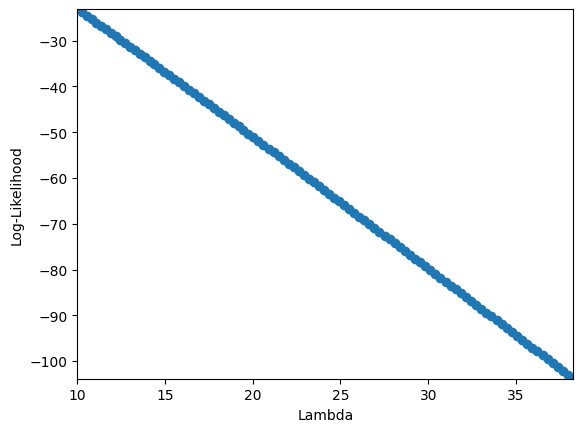

In [56]:
import matplotlib.pyplot as plt

xval = [x[0] for x in result]
yval = [x[1] for x in result]
# Plot with markers to better visualize the points
plt.plot(xval, yval, marker='o')

# Optional: Set axis limits if needed
plt.xlim(min(xval), max(xval))
plt.ylim(min(yval), max(yval))

# Optional: Use logarithmic scale if needed
# plt.yscale('log')

# Label axes for clarity
plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')

# Show the plot
plt.show()

# Following Psuedocode

Many times throughout grad school, you will need to read someone else's outline of an algorithm in plain text, and convert it to a programming language of your choice. Here is some practice.

## Bubble Sort

Write the [`Bubble Sort`](https://en.wikipedia.org/wiki/Bubble_sort#Pseudocode_implementation) in Python using the psuedocode in the link.

##### procedure bubbleSort(A : list of sortable items)
    n := length(A)
    repeat
        swapped := false
        for i := 1 to n-1 inclusive do
            { if this pair is out of order }
            if A[i-1] > A[i] then
                { swap them and remember something changed }
                swap(A[i-1], A[i])
                swapped := true
            end if
        end for
    until not swapped
end procedure

In [21]:
def bubble_sort(nums):
    while True:
      swapped = False
      for i in range(1,len(nums)):
        temp = 0
        # check if out of order
        if nums[i - 1] > nums[i]:
            temp = nums[i-1]
            nums[i-1] = nums[i]
            nums[i] = temp
            swapped = True

      #break
      if (not swapped):
        break # if there is no modifications at all, bubble sort is done
    return nums

input = [1,3,9,2,5,7,8,8,0]
sorted_list = bubble_sort(input)
print(sorted_list)

[0, 1, 2, 3, 5, 7, 8, 8, 9]


## Drawing Trees (Hard)

Complete [this stackexchange challenge](https://codegolf.stackexchange.com/questions/201730/draw-an-ascii-oak-tree-or-a-woman-with-curly-hair).

# Random Normal Variates

Using [`random.random`](https://docs.python.org/3/library/random.html), the [`math` module](https://docs.python.org/3/library/math.html) and the [Box-Muller Method](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) (written below), write a function that will generate $N$ standard normal random variables.

If $U_1$ and $U_2$ are independent samples from a uniform distribution on the unit interval $(0,1)$ then

$$ Z_0 = \sqrt{-2 * \ln U_1} \cos(2\pi U_2), $$
$$ Z_1 = \sqrt{-2 * \ln U_1} \sin(2\pi U_2) $$

are independent standard normal variables.



In [5]:
import random
import math

def generate_standard_normal(N):
    normal_variates = []

    for _ in range((N + 1) // 2):  # Generate enough pairs to get N values
        U1 = random.random()
        U2 = random.random()

        Z0 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
        Z1 = math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2)

        normal_variates.append(Z0)
        if len(normal_variates) < N:  # Only append Z1 if we still need more values
            normal_variates.append(Z1)

    return normal_variates

# Example usage
N = 10  # Number of standard normal variables to generate
random_normals = generate_standard_normal(N)
print(random_normals)


[-2.2798540870270654, -1.0054186530478917, -0.25744399288995024, 0.5994612779721953, -1.6314616739097618, -0.7777187147409275, 1.8298537503944907, -0.1312984435479716, 0.591276108239824, 1.2083083157423902]


# Pillow

Pillow is a cool library that can be used for image processing in Python. Let's do a few exercises with it! Read in the image below.

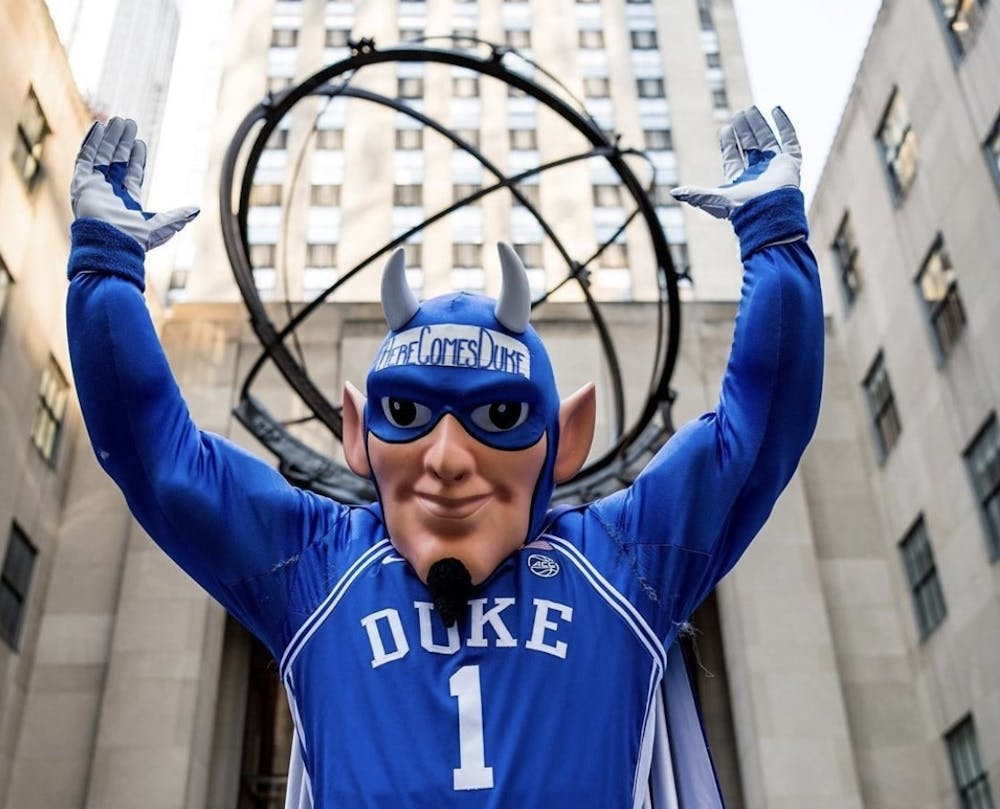

In [9]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://snworksceo.imgix.net/dtc/a26c02cb-32f5-470f-9dd6-58e4d643e83d.sized-1000x1000.jpeg?w=1000")
img = Image.open(BytesIO(response.content))

display(img)

We can access the pixel value in the picture by using `img.load()` and then using the coordinate system. Each pixel is 3 values, the amount of red, blue, and green in the pixel.

Use `img.size` to determine the size of the image. Using two for loops and a dictionary, calculate a histogram of the unique colors in the picture.

In [33]:
print(img.size)

pixels = img.load()

print(pixels[0,0])

(1000, 809)
(241, 214, 185)


What is the most common pixel value in the picture?

In [27]:
# Get a list of all pixels in the image
pixels = list(img.getdata())

# step 2: get count of the values
count = {}
for pixel in pixels:
    #for x in pixel:
      if pixel in count:
        count[pixel] = count[pixel] + 1
      else:
        count[pixel] = 1

print(max(count.items()))

((255, 255, 255), 8264)


Each color in a pixel value can range between 0 and 255. This gives a total of 256 ** 3 = 16.6 million possible values! However, many of the values are very similar. Repeat the process above, but round each pixel value to be in multiples of 5. This reduces to 132651 possible color values. What is the most common rounded color?

In [29]:
# Get a list of all pixels in the image
pixels = list(img.getdata())

def myround(x, base=5):
    return base * round(x/base)

# step 2: get count of the values
count = {}
for pixel in pixels:
    #for x in pixel:
    rp = myround(pixel[0])
    gp = myround(pixel[1])
    bp = myround(pixel[2])
    pixel = (rp,gp,bp)
    if pixel in count:
      count[pixel] = count[pixel] + 1
    else:
      count[pixel] = 1

print(max(count.items()))

((255, 255, 255), 12442)


We can change the values at each pixel by setting the pixel object coordinates to specific values. Set each pixel that is the most common color (using the multiple of 5 version) to black (0, 0, 0). What does the picture look like now?

((255, 255, 245), 2)
(255, 255, 245)


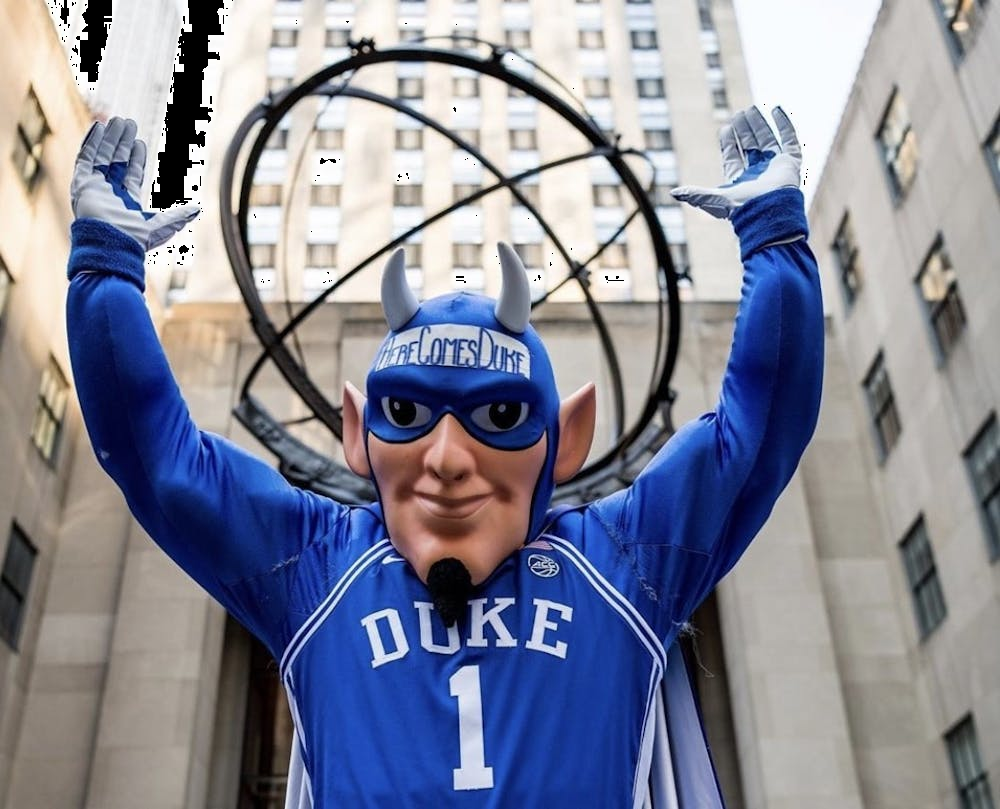

In [42]:
# Get a list of all pixels in the image
pixels = list(img.getdata())

# step 2: get count of the values
count = {}
for pixel in pixels:
    #for x in pixel:
      if pixel in count:
        count[pixel] = count[pixel] + 1
      else:
        count[pixel] = 1

print(max(count.items()))



import numpy as np

pixels = img.load()

favor_pixel = max(count.items())[0]
print(favor_pixel)

for i in range(img.width):
   for j in range(img.height):
      if (pixels[i,j] == favor_pixel):
         pixels[i,j] = (0,0,0)

# Convert the pixel data back to an image and display it
#PIL_image = Image.fromarray(np.uint8(pixels)).convert('RGB')
display(img)


Let's do something more interesting. Reload the picture (since we just changed many of its pixels), and modify every pixel value so that they are an average with its current value and the most common multiple of 5 value, e.g. if the most common value is (200, 100, 50), the average with a pixel with value (102, 22, 48) would be (151, 61, 49).

[135, 138, 154]


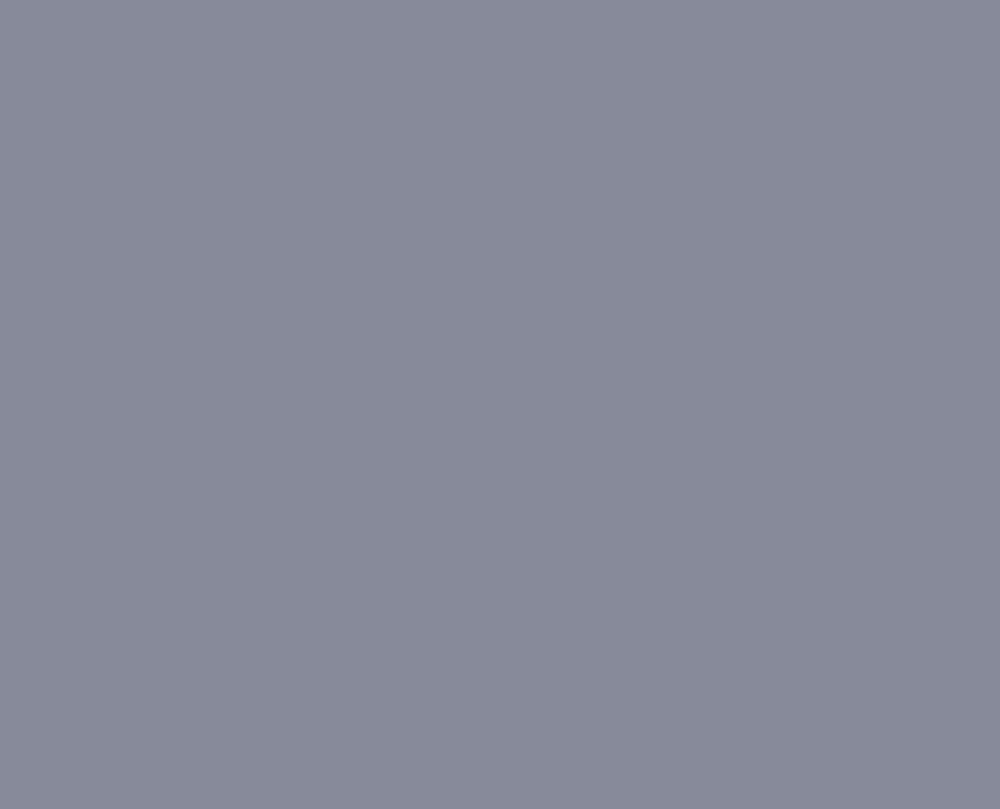

In [53]:
response = requests.get("https://snworksceo.imgix.net/dtc/a26c02cb-32f5-470f-9dd6-58e4d643e83d.sized-1000x1000.jpeg?w=1000")
img = Image.open(BytesIO(response.content))
#pixels = list(img.getdata())


import numpy as np
import math

pixels = img.load()

sum_pixels = [0,0,0]

for i in range(img.width):
   for j in range(img.height):
      sum_pixels[0] = sum_pixels[0] + pixels[i,j][0]
      sum_pixels[1] = sum_pixels[1] + pixels[i,j][1]
      sum_pixels[2] = sum_pixels[2] + pixels[i,j][2]


avg_pixels = [math.floor(x / (img.width * img.height)) for x in sum_pixels]
print(avg_pixels)


for i in range(img.width):
   for j in range(img.height):
     pixels[i,j] = tuple(avg_pixels);

# Convert the pixel data back to an image and display it
#PIL_image = Image.fromarray(np.uint8(pixels)).convert('RGB')
display(img)




Finally lets do very basic image compression. For each pixel, map its value to multiple of 10s. What does the image look like? Use `Image.save` with a `.png` extension and `os.path.getsize` ([example](https://stackoverflow.com/a/35229391)) to compare the size of the picture before and after processing.

In [65]:
response = requests.get("https://snworksceo.imgix.net/dtc/a26c02cb-32f5-470f-9dd6-58e4d643e83d.sized-1000x1000.jpeg?w=1000")
img = Image.open(BytesIO(response.content))


import numpy as np
import math

pixels = img.load()


for i in range(img.width):
   for j in range(img.height):
     p1 = pixels[i,j][0] * 10
     p2 = pixels[i,j][1] * 10
     p3 = pixels[i,j][2] * 10
     curr_pixel = [p1,p2,p3]
     pixels[i,j] = tuple(curr_pixel);

import os
img.save("compressed.png")
print(os.path.getsize("compressed.png"))


from io import BytesIO

origin_img.save("origin.png")
print(os.path.getsize("origin.png"))

189449
900221


# More Practice

Need some more practice? Do whatever feels most helpful:

1. Examine the exercises in [Think Python](https://greenteapress.com/thinkpython2/thinkpython2.pdf) at the end of every chapter
2. Make a [LeetCode](https://leetcode.com/) account and try some challenges to get prepared for tomorrow
3. Complete a tutorial for a library you are interested in
4. Try some [Project Euler](https://projecteuler.net/archives) challenges
5. Try some [/r/DailyProgrammer](https://www.reddit.com/r/dailyprogrammer/) challenges
6. Try to setup Python on your local machine
7. Learn [git](https://www.codecademy.com/learn/learn-git)
8. Feeling overwhelmed? Try [CodingBat](https://codingbat.com/python)